<h3 style='color:green' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. Here, we'll be looking at customer churn in telecom business. We will build a deep learning model to predict the churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the data**

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5102,9070-BCKQP,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.15,7881.2,No
5554,8838-GPHZP,Female,0,No,No,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.60,1298.7,No
1227,8496-DMZUK,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Bank transfer (automatic),90.40,2820.65,No
2874,8347-GDTMP,Female,0,Yes,No,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1225.65,No
328,5697-GOMBF,Female,1,Yes,Yes,28,No,No phone service,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,35.90,973.65,No


**Data exploration**

In [3]:
df.shape

(7043, 21)

In [4]:
# dropping customer id as it not useful for our prediction

df.drop('customerID', axis = 1, inplace= True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
# converting Totalcharges to numeric
pd.to_numeric(df.TotalCharges)

# Here we can see that, there are spaces present in the column

ValueError: Unable to parse string " " at position 488

some values seems to be not a numbers but blank string. Let's find out such rows

In [9]:
# to handle this, we are ignoring the errors
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().sum()

11

In [10]:
# these are the 11 rows

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**Dropping all the rows with spaces in totalcharges**

In [11]:
df1 = df[df.TotalCharges!= ' ']
df1.shape

(7032, 20)

In [12]:
# Now converting totalcharges column to numeric

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\shubh\anaconda3\envs\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Data visualisation**

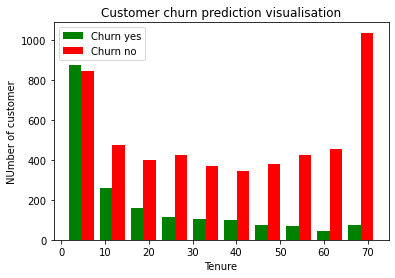

In [15]:
tenure_churn_no = df1[df1.Churn =='No'].tenure
tenure_churn_yes = df1[df1.Churn =='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel("NUmber of customer")
plt.title("Customer churn prediction visualisation")
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn yes', 'Churn no'])
plt.legend()

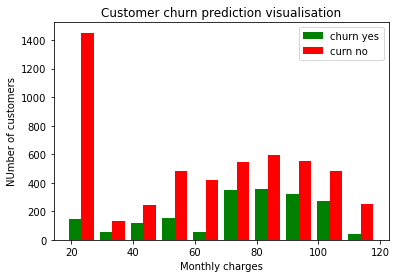

In [16]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('NUmber of customers')
plt.title("Customer churn prediction visualisation")

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['churn yes', 'curn no'])
plt.legend()

**Many of the columns are yes, no**

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}:{df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [19]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\shubh\anaconda3\envs\venv\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


**Converting Yes and No to 1 or 0**

In [21]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

C:\Users\shubh\anaconda3\envs\venv\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [22]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [24]:
df1.gender.unique()

array([1, 0], dtype=int64)

**Using One hot encoding**

In [25]:
df2 = pd.get_dummies(data = df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6119,1,0,0,0,14,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1308,0,1,0,0,16,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2585,1,0,0,0,37,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6711,1,0,1,1,49,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
4135,1,0,1,1,36,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [28]:
column_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[column_to_scale] = scaler.fit_transform(df2[column_to_scale])

In [29]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4578,1,0,0,0,0.126761,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3201,1,0,0,0,0.690141,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
3233,0,1,1,0,0.042254,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [30]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [31]:
X = df2.drop('Churn', axis = 1)
y = df2['Churn']

**Train_test_split**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

**Building a model (ANN) with tensorflow / keras**

In [35]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7474
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7984
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8030
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8073
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4028 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8379
Epoch 81/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8370
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8363
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8363
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8345
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8393
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8389
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8368
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8375
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 

In [36]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7591


[0.48509132862091064, 0.7590618133544922]

In [37]:
yp = model.predict(X_test)
yp[:5]

array([[0.28370696],
       [0.6702183 ],
       [0.01420495],
       [0.73265636],
       [0.35718262]], dtype=float32)

In [38]:
y_prediction = []

for element in yp:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [39]:
y_prediction[:5]

[0, 1, 0, 1, 0]

<h3 style='color:green'>Classification Report</h3>

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       999
           1       0.59      0.55      0.57       408

    accuracy                           0.76      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.75      0.76      0.76      1407



**_From f1-score, its clear that, there is a imbalanced in the datasets_**

**The f1 score for 1 is pretty low, whereas for 0 it is high.
Here accuracy is 76%, but accuracy is kinda useless if your dataset is imbalanced.
So, we want is f1-sclore for the individual classes, which is 0 and 1 to be higher.**



<h3 style='color:green'>Handling imbalanced datasets (SMOTE Technique)</h3>

In [41]:
from tensorflow import losses

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [44]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7576
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7789
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7843
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.7870
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.7887
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.7927
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7939
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7939
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.7979
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4339 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8460
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8466
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8508
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8488
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8498
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8536
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.8536
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8505
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8513
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 

**_SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.76 to 0.81_**

<h3 style='color:green'>Confusion matrics</h3>

Text(69.0, 0.5, 'Truth')

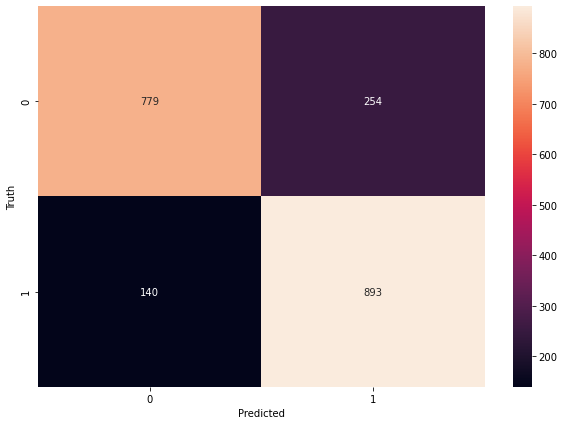

In [48]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
Accuracy = round((779+893) / (779+254+140+893),2)
Accuracy

0.81

In [50]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7657


[0.48087260127067566, 0.7657308578491211]

In [54]:
y_prediction[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 1, 1]

In [55]:
yp[:10]

array([[0.28370696],
       [0.6702183 ],
       [0.01420495],
       [0.73265636],
       [0.35718262],
       [0.9899601 ],
       [0.09991282],
       [0.53315526],
       [0.617118  ],
       [0.73619336]], dtype=float32)